In [126]:
import pandas as pd
import datetime as dt
import pymysql
import matplotlib.pyplot as plt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.dates as mdate
from datetime import time
from typing import Iterable

class Kline(object):
    def DrawKline(self,aa,**para):
    #     date='2014-01-03'
        # aa=df1[str(date)]
        aa.reset_index(drop=True,inplace=True)
        fig =plt.figure(figsize=(30, 12),facecolor='w')

        #副图是主图的比例
        w1=0.25
        w2=0.8/(1+w1)*w1
        rec1=[0.1,0.1+w2,0.9,w2/w1]
        rec2=[0.1,0.1,0.9,w2]
        ax=fig.add_axes(rec1)
        ax1=fig.add_axes(rec2,sharex=ax)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=True)

        #设置时间刻度
        dlist=aa.datetime.apply(lambda x:str(x.time()))
        dd=dlist.values
        d1=[i*100 for i in range(len(dd))]
        ax1.set_xticks(d1[::30])
        ax1.set_xticklabels(dd[::30])

        Kline={}
        Kline['W'] = 80
        Kline['Diff'] = 20
        Kline['WW']=100
        
        if 'rec' in para.keys():
            id1=para['rec'][0]
            id2=para['rec'][1]
            y1=aa[id1:id2]['close'].max()
            y2=aa[id1:id2]['close'].min()
            a1 =(id1+1)*Kline['WW']
            a2 =(id2+1)*Kline['WW']
            ax.axvline(a1,ymax=1,c= "b",ls = "dashed")    
            ax.axvline(a2,ymax=1,c= "b",ls = "dashed")
            ax.axhline(y1,xmax=1,c= "b",ls = "dashed")
            ax.axhline(y2,xmax=1,c= "b",ls = "dashed")
        
        if 'buy' in para.keys():
            buy=para['buy']
            if not isinstance(buy, Iterable):
                buy = [buy]
            for pos in buy:
                x =(pos+1)*Kline['WW']
                y=aa.iloc[pos]['low']-5
                ax.plot(x,y,'r^')
        
        if 'sell' in para.keys():
            sell=para['sell']
            if not isinstance(sell, Iterable):
                sell = [sell]
            for pos in sell:
                x =(pos+1)*Kline['WW']
                y=aa.iloc[pos]['high']+5
                ax.plot(x,y,'gv')
        
        
        d=0
        rows=len(aa)
        for i in aa.iterrows():
            Row=i[1]
            x1 =(d+1)*Kline['WW']
            x2 = x1-Kline['W']/2
            O = Row['open']
            C = Row['close']
            L = Row['low']
            H = Row['high']
            hh = abs(C - O)

            if C > O:
                a = False
                y = O
                cc = 'R'
                # 上影线 下影线
                line1 = Line2D((x1, x1), (C, H), color=cc)
                line2 = Line2D((x1, x1), (O, L), color=cc)

                ax.add_line(line1)
                ax.add_line(line2)
            else:
                a = True
                y = C
                cc = 'C'
                # 影线
                line = Line2D((x1, x1), (L, H), color=cc)
                ax.add_line(line)
            hh = abs(C - O)

            # K线实体
            rec = Rectangle((x2, y), Kline['W'], hh, fill=a, color=cc)
            ax.add_patch(rec)

            if Row['macd']>0:
                rec= Rectangle((x2, 0), Kline['W'], Row['macd'], fill=a, color='R')
            else:
                rec= Rectangle((x2, 0), Kline['W'], Row['macd'], fill=a, color='C')
            ax1.add_patch(rec)
            d+=1
            
        if any(["ma60" in aa.columns,"MA60" in aa.columns]):
            ax.plot(aa.index*Kline['WW']+Kline['WW'],aa['ma60'],c='r')
        if any(["ma30" in aa.columns,"MA30" in aa.columns]):
            ax.plot(aa.index*Kline['WW']+Kline['WW'],aa['ma30'],c='b')
        ax1.axhline(0,linestyle="--",linewidth=0.5,color='k')
        if "diff" in aa.columns:
            ax1.plot(aa.index*Kline['WW']+Kline['WW'],aa['diff'],c='b',linewidth=0.5)
        if "dea" in aa.columns:
            ax1.plot(aa.index*Kline['WW']+Kline['WW'],aa['dea'],c='y',linewidth=0.5)

        ax.grid()
        ax1.grid()
        ax.autoscale(tight=False)
        ax.autoscale_view()

        time1=aa.iloc[0]['datetime']
        time2=aa.iloc[-1]['datetime']
        title="%s--%s" %(time1,time2)
        ax.set_title(title, fontsize=20, color='r')
        # fig.savefig("a.jpg")
        plt.show()
        fig.clear()
        plt.close(fig)

print("OK")


OK


In [ ]:
from typing import Iterable

In [7]:
aa=pd.read_pickle("pkl/HSI1903")
bb=aa[aa.trade_date=='2019-03-28']

In [43]:
def abc(*a,**b):
    print(a)
    print(b)

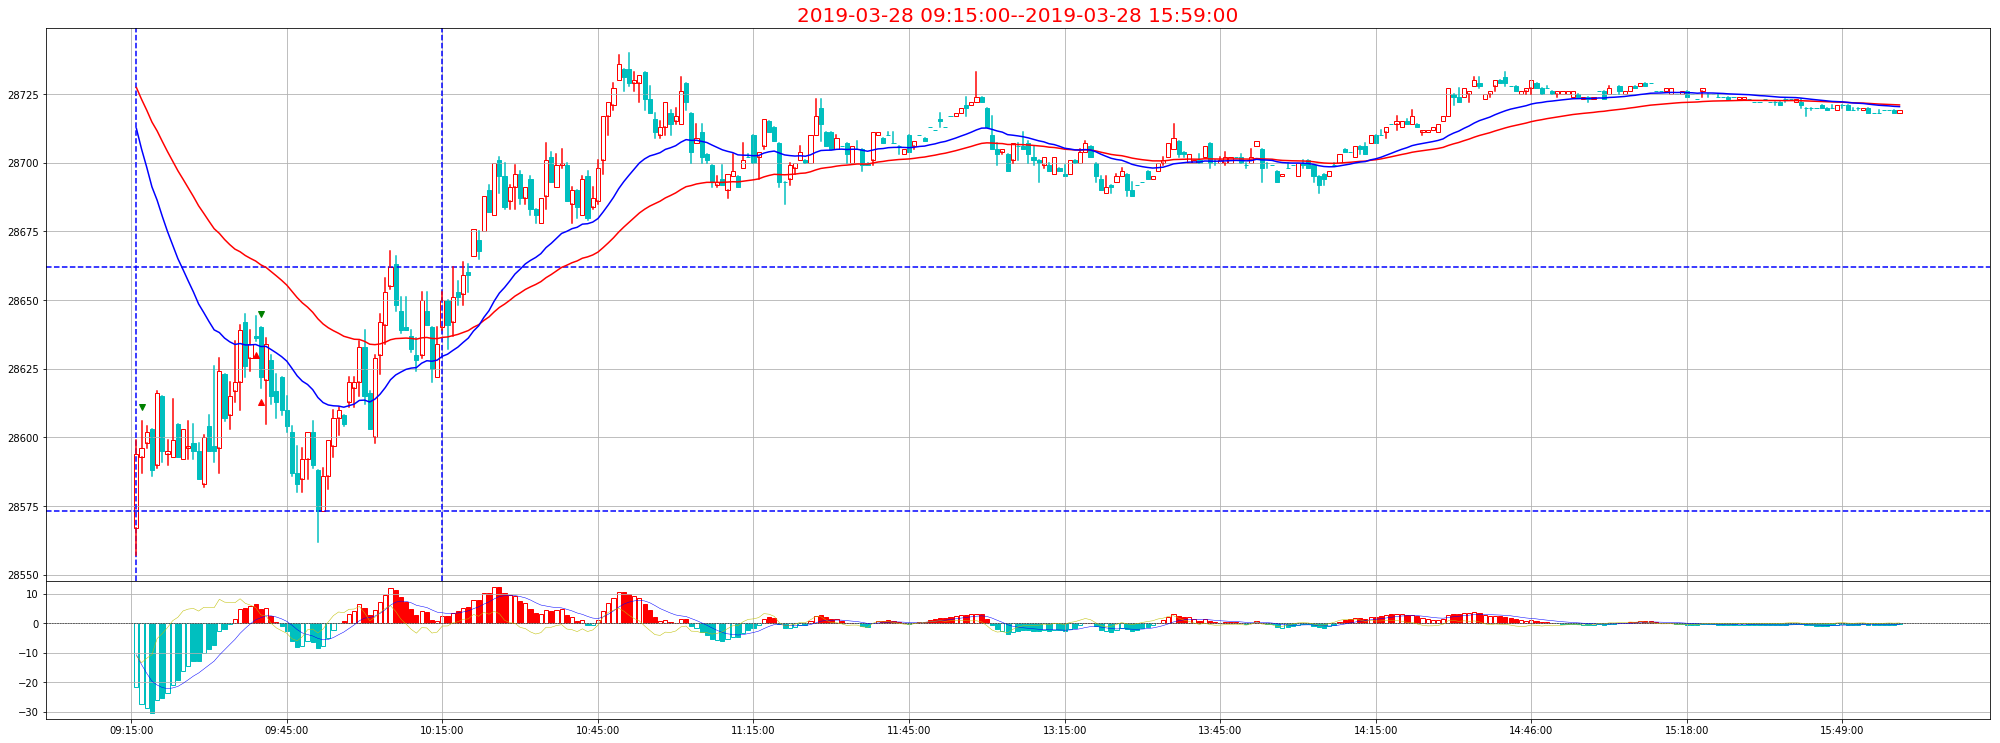

In [129]:
kk=Kline()
kk.DrawKline(bb,rec=[0,59],sell=(1,24),buy=(23,24))